In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
california = fetch_california_housing()

In [3]:
#description of the dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california.data.shape, california.target.shape

((20640, 8), (20640,))

In [5]:
type(california.data)

numpy.ndarray

In [7]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Simple Linear Regressor : X_1 to Y

In [11]:
x = california['data'][..., 2:3]
y = california['target']

Text(0, 0.5, 'MedHouseVal')

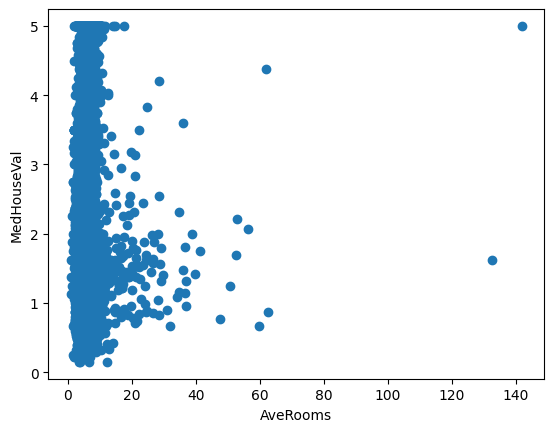

In [13]:
plt.scatter(x[..., 0], y)
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [15]:
print(x_train.shape, x_test.shape)

(16512, 1) (4128, 1)


In [16]:
model = LinearRegression()

In [17]:
model.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'MedHouseVal')

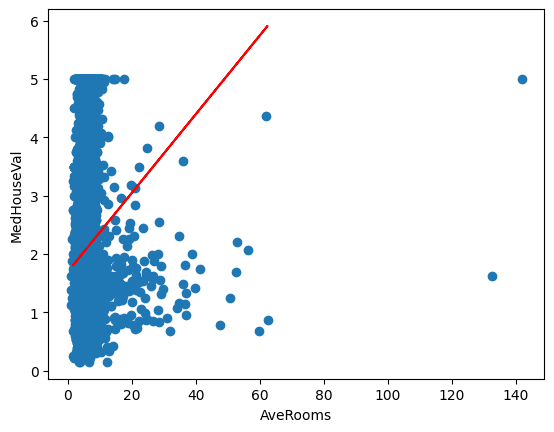

In [19]:
plt.scatter(x[..., 0], y)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')

In [20]:
# y = wx + b

w = model.coef_
b = model.intercept_
print(w, b)

[0.06744633] 1.702059565421322


In [21]:
print(y_pred[0], w*x_test[0] + b)

2.0834326862806174 [2.08343269]


In [22]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.024828367909623617 1.338901961051685


### Trying Linear Regression with Another Variable

In [23]:
x = california['data'][..., 0:1]
y = california['target']

Text(0, 0.5, 'MedHouseVal')

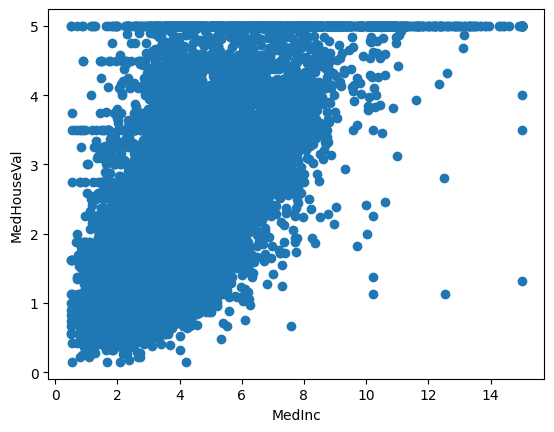

In [24]:
plt.scatter(x[..., 0], y)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [26]:
print(x_train.shape, x_test.shape)

(16512, 1) (4128, 1)


In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'MedHouseVal')

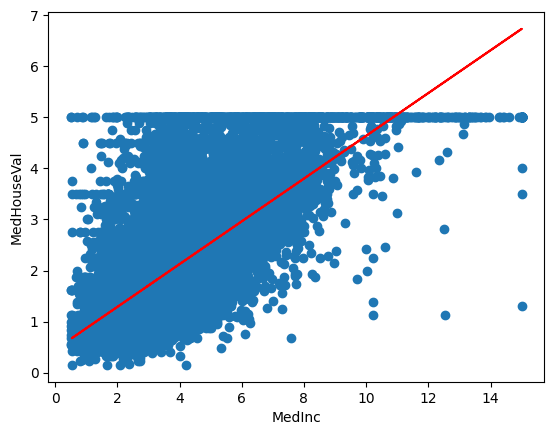

In [30]:
plt.scatter(x[..., 0], y)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

In [31]:
# y = wx + b

w = model.coef_
b = model.intercept_
print(w, b)

[0.41901193] 0.4490351519016138


In [32]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.4839536708133253 0.6864635843606353


# Multi-linear Regression with all input variables

In [33]:
x = california['data']
y = california['target']

In [34]:
print(x.shape)

(20640, 8)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [38]:
w = model.coef_
b = model.intercept_
print(w, b)

[ 4.32348319e-01  9.48531681e-03 -9.96708018e-02  5.95648025e-01
 -1.15907267e-06 -3.95916712e-03 -4.23765876e-01 -4.36907176e-01] -37.12000017137562


In [39]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6038877035463748 0.5244523593177203


### Multi-linear Regression with selected input variables

In [40]:
x = california['data'][..., [0,4,6,7]]
y = california['target']

In [41]:
x.shape

(20640, 4)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [44]:
w = model.coef_
b = model.intercept_
print(w, b)

[ 3.65624759e-01 -4.28261269e-05 -4.88264820e-01 -5.00990779e-01] -41.792326120773254


In [45]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6009180949970034 0.5456449679046212


### Another Retry

In [67]:
x = california['data'][..., [0,1,4,6,7]]
y = california['target']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [69]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [70]:
w = model.coef_
b = model.intercept_
print(w, b)

[ 3.78849208e-01  9.24967177e-03 -9.89862076e-06 -4.40554543e-01
 -4.49629189e-01] -37.71201331759873


In [71]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6036582313014205 0.5293553200884038
